In [50]:
import pandas as pd

In [51]:
#!pip install matplotlib

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

#It tells Jupyter to:
#Display Matplotlib plots **directly inside the notebook output cell**, instead of opening them in a separate window.


In [53]:
#!pip install kaggle

In [54]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("pablomgomez21/drugs-a-b-c-x-y-for-decision-trees")

#print("Path to dataset files:", path)

In [55]:
""""Drugs A, B, C, X, Y" Dataset: 
Available on Kaggle, this is a small, purpose-built dataset used for illustrating decision tree concepts, 
where the goal is to classify which drug a patient should be prescribed based on various attributes."""

'"Drugs A, B, C, X, Y" Dataset: \nAvailable on Kaggle, this is a small, purpose-built dataset used for illustrating decision tree concepts, \nwhere the goal is to classify which drug a patient should be prescribed based on various attributes.'

In [56]:
df = pd.read_csv(r"D:\Coding\GIT\Data-Science\Notes\Data\drugs-a-b-c-x-y-for-decision-trees\versions\1\drug200.csv")

In [57]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [59]:
cols_to_encode = ['Sex', 'BP', 'Cholesterol','Drug']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=cols_to_encode, dtype=int)

print("\nEncoded DataFrame:")
df_encoded


Encoded DataFrame:


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,25.355,1,0,1,0,0,1,0,0,0,0,0,1
1,47,13.093,0,1,0,1,0,1,0,0,0,1,0,0
2,47,10.114,0,1,0,1,0,1,0,0,0,1,0,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,1,0
4,61,18.043,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0,0,0,1,0,0
196,16,12.006,0,1,0,1,0,1,0,0,0,1,0,0
197,52,9.894,0,1,0,0,1,1,0,0,0,0,1,0
198,23,14.020,0,1,0,0,1,0,1,0,0,0,1,0


df_encoded is not required

In [62]:
cols_to_encode = ['Sex', 'BP', 'Cholesterol','Drug']

In [70]:
Encoders = {}
for col in cols_to_encode:
    elem_list = list(df[col].unique())
    my_dict = {element: index for index, element in enumerate(elem_list)}
    Encoders[col] = my_dict

In [71]:
Encoders

{'Sex': {'F': 0, 'M': 1},
 'BP': {'HIGH': 0, 'LOW': 1, 'NORMAL': 2},
 'Cholesterol': {'HIGH': 0, 'NORMAL': 1},
 'Drug': {'drugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4}}

In [72]:
df = df.replace(Encoders)

C:\Users\amank\AppData\Local\Temp\ipykernel_42864\1654892934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(Encoders)


In [73]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,1
196,16,1,1,0,12.006,1
197,52,1,2,0,9.894,2
198,23,1,2,1,14.020,2


In [75]:
X=df.iloc[:,:-1]
y = df["Drug"]


In [76]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [77]:
y

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug, Length: 200, dtype: int64

In [78]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
treemodel=DecisionTreeClassifier()

In [81]:
treemodel.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [82]:
#prediction
y_pred=treemodel.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [85]:
#PostPrunning

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.692\nsamples = 134\nvalue = [62, 10, 35, 15, 12]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.673\nsamples = 72\nvalue = [0, 10, 35, 15, 12]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.494\nsamples = 27\nvalue = [0, 0, 0, 15, 12]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.346\nsamples = 45\nvalue = [0, 10, 35, 0, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 21\nvalue = [0, 10, 11, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24, 0, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 62\nvalue = [62, 0, 0, 0, 0]'),
 Text(0.6875, 0.8, '  False')]

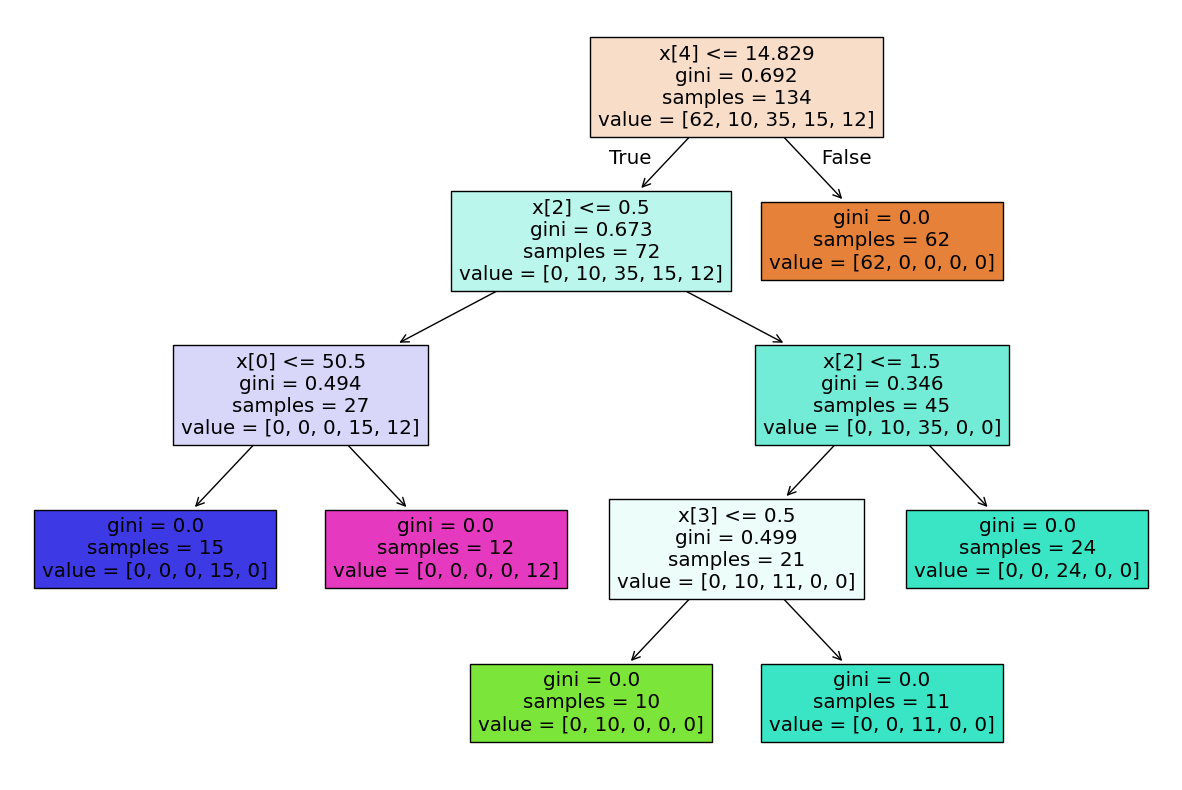

In [86]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [88]:
#cost complexity pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores.append(score)

optimal_alpha = ccp_alphas[np.argmax(scores)]
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.0


| Alpha Value  | Effect                 |
| ------------ | ---------------------- |
| α = 0        | No pruning (full tree) |
| Small α      | Slight pruning         |
| Medium α     | Balanced tree          |
| Large α      | Very small tree        |
| Very large α | Root node only         |
As α increases → tree becomes simpler.

#depth pruning
#we can observe x[3]< 0.5, split at this node can't give us garuntee, so i will remove tree after this depth.

In [90]:
treemodel=DecisionTreeClassifier(max_depth = 3)

In [92]:
treemodel.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [93]:
#prediction
y_pred=treemodel.predict(X_test)

In [94]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.00      0.00      0.00         0
           2       1.00      0.76      0.86        25
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           0.91        66
   macro avg       0.80      0.75      0.77        66
weighted avg       1.00      0.91      0.95        66



c:\Users\amank\anaconda3\envs\RAG\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\amank\anaconda3\envs\RAG\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\amank\anaconda3\envs\RAG\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[Text(0.625, 0.875, 'x[4] <= 14.829\ngini = 0.692\nsamples = 134\nvalue = [62, 10, 35, 15, 12]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.673\nsamples = 72\nvalue = [0, 10, 35, 15, 12]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[0] <= 50.5\ngini = 0.494\nsamples = 27\nvalue = [0, 0, 0, 15, 12]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.75, 0.375, 'x[2] <= 1.5\ngini = 0.346\nsamples = 45\nvalue = [0, 10, 35, 0, 0]'),
 Text(0.625, 0.125, 'gini = 0.499\nsamples = 21\nvalue = [0, 10, 11, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24, 0, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 62\nvalue = [62, 0, 0, 0, 0]'),
 Text(0.6875, 0.75, '  False')]

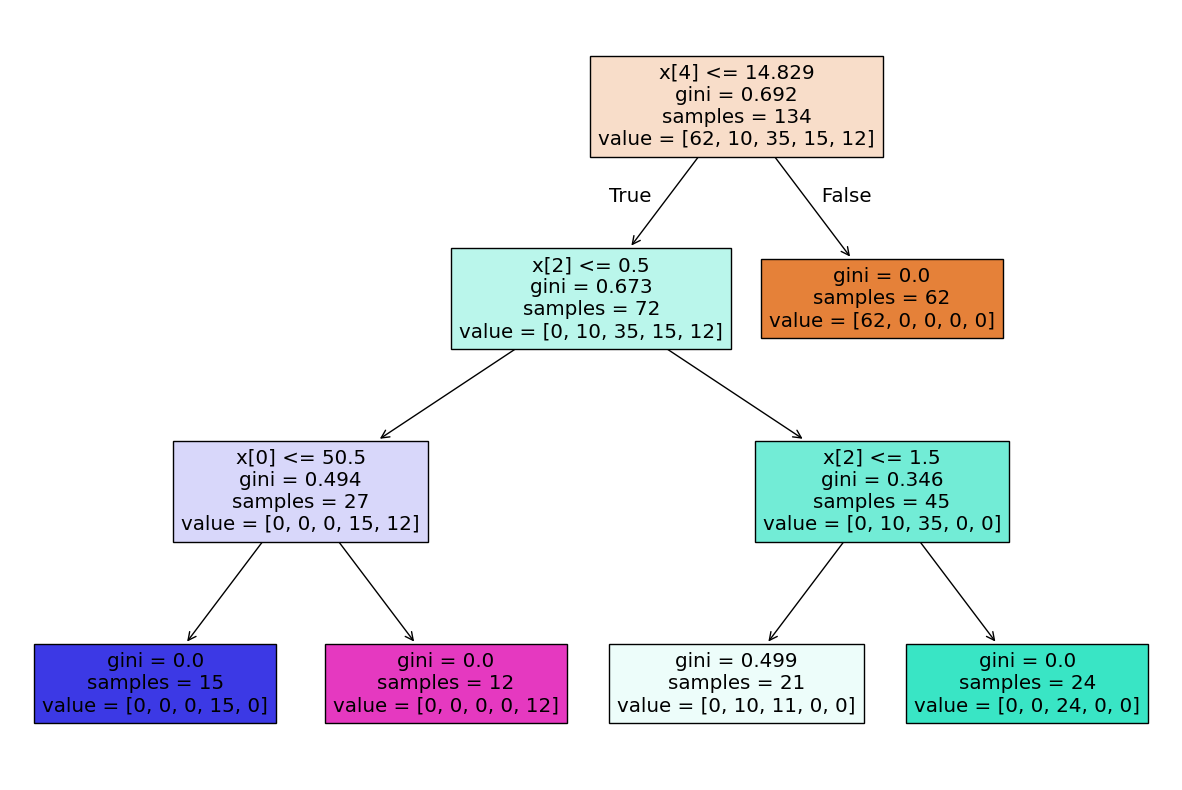

In [95]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)